 number of umatched 757/9998


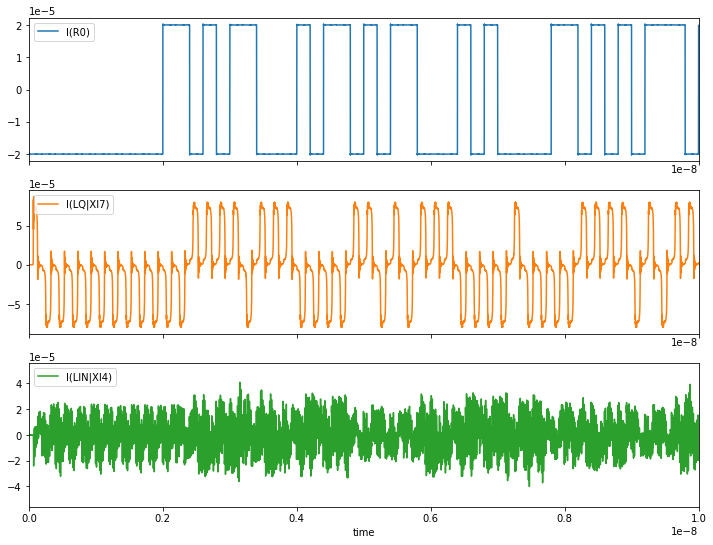

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import subprocess
import numpy as np
# without noise


df  = pd.read_csv("test/netlist.spice_5.CSV",index_col = 0)
df.plot(subplots=True,figsize=(12,9))
plt.xlim(0,1e-8)

# nomal state

def get_data(data: pd.DataFrame, dt:float, period:float,begin:float):
    start = int(begin/dt)
    step = int(period/dt)
    return data.iloc[start:None:step].copy()

def binarization(data:pd.Series, th_1:float=1e-6, th_0:float = -1*1e-6):
    data.loc[data<th_0] = 0
    data.loc[data>th_1] = 1

dt = float(df.index[1]- df.index[0])
input = get_data(df["I(R0)"],dt,200*10**-12, 100*10**-12)
data = get_data(df["I(LQ|XI7)"],dt,200*10**-12, 240*10**-12)
binarization(input, 0,0)
binarization(data,0,0)


# input.plot(figsize = (16,3))
# data.plot()
# plt.xlim(0,1e-8)

print(f" number of umatched {np.count_nonzero(data.values[1:] !=input.values[0:-2])}/{len(data.values[1:])}")

In [14]:
def get_data(data: pd.DataFrame, dt:float, period:float,begin:float):
    start = int(begin/dt)
    step = int(period/dt)
    return data.iloc[start:None:step].copy()

def binarization(data:pd.Series, th_1:float=1e-6, th_0:float = -1*1e-6):
    data.loc[data<th_0] = 0
    data.loc[data>th_1] = 1

dt = float(df.index[1]- df.index[0])
input = get_data(df["I(R0)"],dt,200*10**-12, 100*10**-12)
data = get_data(df["I(LQ|XI7)"],dt,200*10**-12, 240*10**-12)
binarization(input, 0,0)
binarization(data,0,0)


# input.plot(figsize = (16,3))
# data.plot()
# plt.xlim(0,1e-8)

print(f" number of umatched {np.count_nonzero(data.values[1:] !=input.values[0:-2])}/{len(data.values[1:])}")


 number of umatched 0/9998


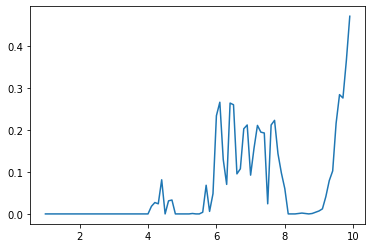

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import subprocess
import numpy as np
# without noise


df  = pd.read_csv("test/BER_12_16_14_24_42.csv",names = ("length ps","imp","error"))
imp8 = df[df["imp"] == 12]
plt.plot(imp8["length ps"],imp8["error"])

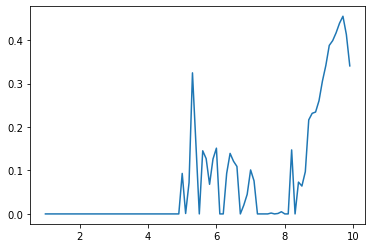

In [51]:
df  = pd.read_csv("test/BER_12_16_11_59_37.csv",names = ("length ps","imp","error"))
imp8 = df[df["imp"] == 8]
plt.plot(imp8["length ps"],imp8["error"])

In [15]:
from simulation.generate_input import main as gene_in


0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
1010001010111111
0101000101001111
1011010111000110
1010110111010001
0000111110001010
0001100110100111
0111100110011001
0011101110111110
0000110100001010
1010101011110110
1101010101001111
1001110111111000
0110101110000011
0111110000101101
1111111100011010
1010110100001001
0000001110111000
0001000001010111
1010110101000101
1100110000011100
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1'

In [41]:
data.values[1:] ==input.values[0:-2]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [32]:
input.values[-12:-2]

array([0., 0., 1., 1., 1., 0., 1., 1., 0., 0.])

(0.0, 100000000000.0)

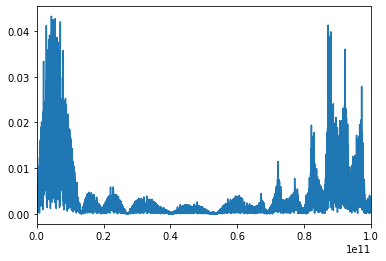

In [110]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,1*10**11)

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

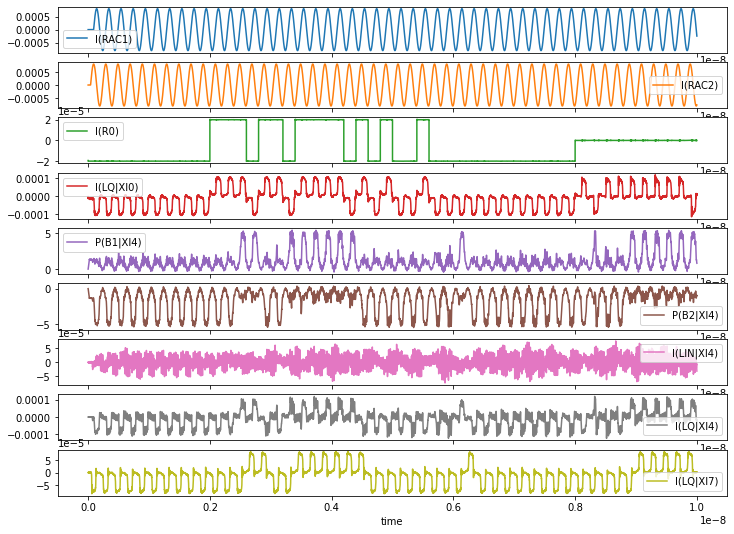

In [90]:
#with noise

subprocess.run(["/usr/bin/josim_v265","netlist_post.spice"], stdout=subprocess.DEVNULL)
df  = pd.read_csv("out.csv",index_col = 0)
df.plot(subplots=True,figsize=(12,9))

(0.0, 100000000000.0)

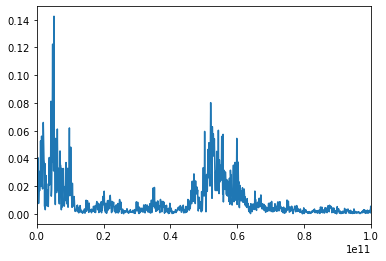

In [85]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(0.1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,10**11)
#8-8-8

(0.0, 100000000000.0)

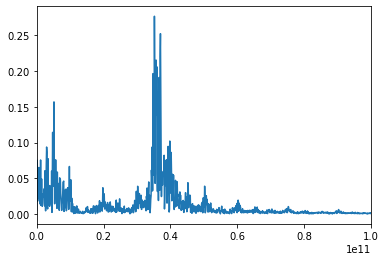

In [83]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(0.1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,10**11)

#8-2-8

(0.0, 100000000000.0)

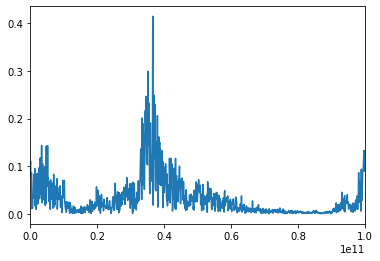

In [87]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(0.1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,10**11)

#2-2-2

(0.0, 100000000000.0)

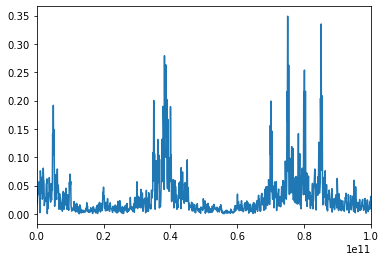

In [89]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(0.1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,10**11)

#2-8-2

(0.0, 100000000000.0)

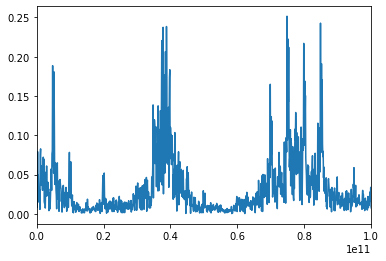

In [91]:
F = np.fft.fft(df["I(LIN|XI4)"])
freq = np.linspace(0,(1.0/(0.1*10**-12)),len(df["I(LIN|XI4)"]))
plt.plot(freq,np.abs(F))
plt.xlim(0,10**11)

#2-2-2